# Przygotowanie

Przygotowanie Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko. {nr_albumu}_{imię}_{nazwisko}_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji.

# Drzewa decyzyjne

Podobnie jak w przypadku maszyny wektorów nosnych (SVC), drzewa decyzyjne sa wszechstronnym algorytmem uczenia maszynowego. Mogą słuzyc do rozwiazywania problemów zarówno klasyfikacji, jak i regresji. W przeciwieństwie do modelu SVC drzewa decyzyjne nie wymagają restrykcyjnego przygotowania danych (np. skalowania cech). Drzewa decyzyjne składaja sie z korzenia oraz gałezi prowadzacych do kolejnych wierzchołków. W wezłach - wierzchołkach z których wychodzi co najmniej jedna krawedź, sprawdzany jest pewien warunek. Na jego podstawie, wybierana jest gałaz prowadząca do kolejnego wierzchołka. Dana obserwacja zostaje zaklasyfikowana do konkretnej klasy po przejściu od korzenia do liscia i przypisaniu do tej obserwacji klasy, z danego liscia (nie wychodza z niego wezły potomne).

Za pomocą drzew decyzyjnych otrzymać możemy potężne modele zdolne do nauki złożonych zbiorów danych.

###  Las losowy

Klasyfikator lasu losowego jest klasyfikatorem zespołowym złozonym z drzew decyzyjnych. Klasyfikator ten wprowadza dodatkową losowość do wzrostu drzew. Nie wyszukuje on najlepszej cechy podczas podziału na wezły, ale szuka najlepszej cechy wsród losowego podziału cech. Powoduje to wieksze zróznicowanie powstałych w klasyfikatorze drzew. Losowe lasy są bardziej odporne na nadmierne dopasowanie się do zbioru treningowego, jakie spotykane jest podczas użycia drzew decyzyjnych.

In [57]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [58]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{np.int64(0): np.int64(50),
 np.int64(1): np.int64(50),
 np.int64(2): np.int64(50)}

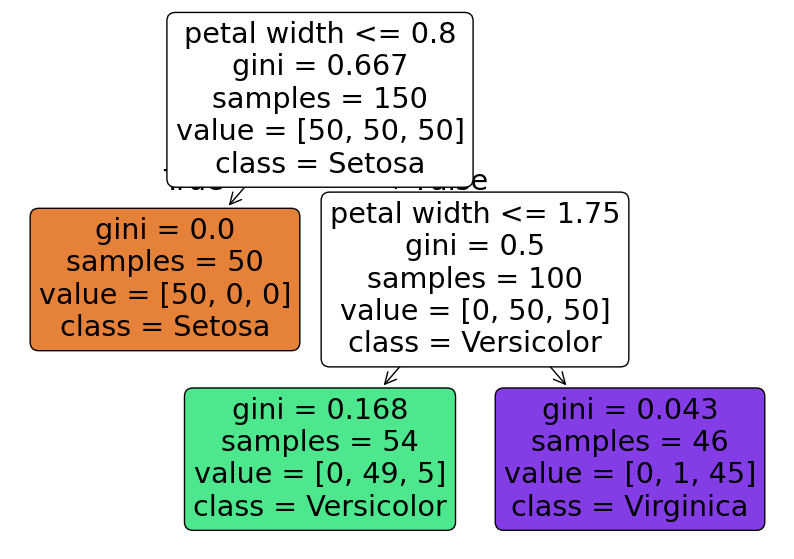

In [59]:
import matplotlib.pyplot as plt
from pydotplus import graph_from_dot_data
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.tree import plot_tree

tree = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1)
tree.fit(X, y)

plt.figure(figsize=(10, 7))

plot_tree(tree, 
          filled=True, 
          rounded=True,
          class_names=['Setosa', 
                       'Versicolor',
                       'Virginica'],
          feature_names=['petal length', 
                         'petal width']) 

plt.show()

### Jak podejmowane są decyzje w drzewie?

Klasyfikacja próbki zaczyna się zawsze od korzenia (węzeł na samej górze grafu). W węźle zadawane jest pytanie (w przykładnie powyżej czy długość płatka jest mniejsza od 0.8). Jeśli prawda przechodzimy do węzła potomnego lewego, w przeciwnym razie do prawego. Przechodząc do węzła lewego dochodzimy do **liścia** (leaf node, nie posiada węzłów potomnych) - w taki wypadku żadne pytanie nie jest zadawane, przydzielana jest już tylko klasa do danej obserwacji. 

W przypadku, gdy skierujemy się ku węzłowi prawemu (nie jest już liściem) zadajemy kolejne pytanie, aż dojdziemy do liścia.

Znaczenie atrybutów:

- *samples* - oznacza ilość wyznaczonych próbek dla danego węzła (zgadza się to w przedstawionym przypadku z ilością próbek dla danych klas)
- *value* - określa ilość przykładów uczących z każdej klasy jakie przynależą do danego węzła.
- *gini* - miara zanieczyszczenia węzła (0 oznacza, że wszystkie próbki w węźle należą do jednej klasy - idealna klasyfikacja)

Wskaźnik Gingiego:
    \begin{equation*}
 G_{i} = 1 - \sum_{k=1}^{n} p_{i, k}^{2}
\end{equation*}
gdzie $p_{i,k}$ oznacza współczynie występowania klas k, wśród próbek uczących w węźle i.

Jako wskaźnik zanieczyszczenia (parametr *entropy*), użyta może zostać również miara entropii. Wynosi ona 0, w przypadku, gdy wszystkie informacje są takie same - wszystkie próbiki w węźle należą do jednej klasy.

Entropia:
    
\begin{equation*}
    H_{i} = - \sum_{k=1\\ p_{i,k} \neq 0}^{n} p_{i, k} log(p_{i,k})
\end{equation*}


Różnice pomędzy tymi dwoma miarami są zazwyczaj bardzo znikome i nie wypływają znacząco na skuteczność działania klasyfikatora. Dla zainteresowanych szczegółami zapraszam do lektury: https://sebastianraschka.com/faq/docs/decision-tree-binary.html, https://towardsdatascience.com/the-simple-math-behind-3-decision-tree-splitting-criterions-85d4de2a75fe

W jakim momencie przestać budować drzewo decyzyje?

Problemy rozważane w uczeniu maszynowym mają zazwyczaj sporą liczbę cech, która może powodować wysoko rosnące skomplikowanie drzewa (jego wielkość, sporą ilość węzłów oraz podziałów w węzłach). Tak utworzone drzewa mogą powodować nadmierne dopasowanie do danych treningowych.

Algorytm drzewa decyzyjnego posiada parametry, które ustalane są podczas uczenia. Jak wspomniano, może powodować to przetrenowanie klasyfikatora (nadmierne dopasowanie do danych uczących). Aby tego uniknąć, dobrym rozwiązaniem okazuje się ograniczenie swobody działania klasyfikatora. Podobnie jak w przypadku klasyfikatora SVC, również dla drzewa decyzyjnego zdefinowane zostały parametry regularyzacyjne:

- *max_depth* - maksymalna wysokość drzewa
- *min_samples_split* - minimalna liczba próbek, jakie będą w węźle (przed podziałem)
- *min_samples_leaf* - minimalna liczba próbek, jakie będą w liściu
- *max_leaf_nodes* - maksymalna ilość liści
- *max_features* - maksymalna liczba cech używana do dzielenia węzła.

Modyfikacja tych parametrów powoduje regularyzację drzewa i zmniejsza ryzyko przetrenowania.

## Zadania

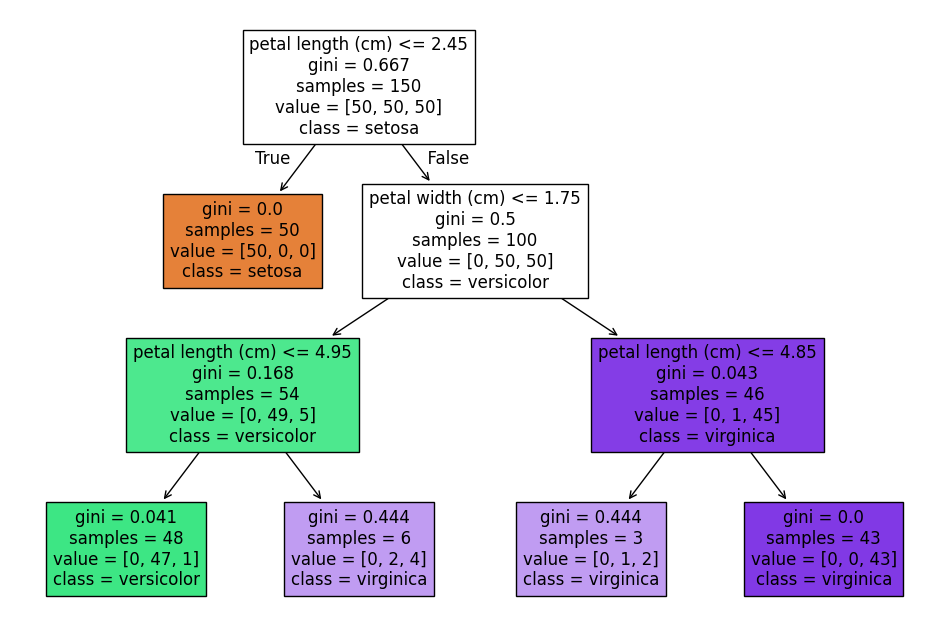

In [60]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X, y)

plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


### Zadanie 1

ValueError: Filler values must be provided when X has more than 2 training features.

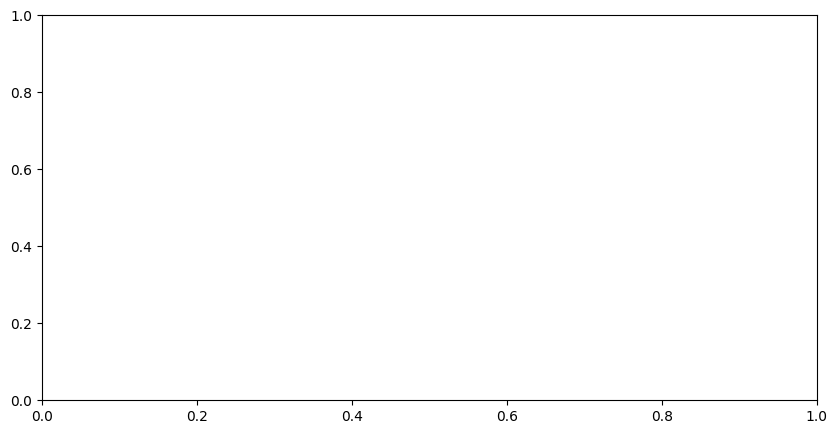

In [62]:
from mlxtend.plotting import plot_decision_regions

tree = DecisionTreeClassifier(max_depth=10, criterion="entropy", random_state=1)
tree.fit(np.log(X ** 8), y)
fig = plt.figure(figsize=(10,5))
labels = ['Decision Tree']
fig = plot_decision_regions(X=np.log(X ** 8), y=y, clf=tree, legend=2)
plt.title("Decision boundary")
plt.show()

Jakie wnioski możne sformuować na bazie granic decyzyjnych przedstawionych powyżej? W momencie pojawianie się dodatkowej próbki klasy *zielonej* (2), zostanie ona dobrze sklasyfikowana? Czy klasyfikator posiada dobre właściwości generalizujące?

In [ ]:
Klasyfikator prezentuje dobrą generalizację wewnątrz zakresu danych treningowych. Granice są przejrzyste, a przestrzenie klas sensownie rozdzielone. 
Nowe próbki klasy zielonej będą prawdopodobnie dobrze sklasyfikowane, o ile znajdują się w obszarze podobnym do istniejących danych.

### Zadanie 2

Proszę o wczytanie, opisanie zbioru danych: https://www.kaggle.com/datasets/mathchi/diabetes-data-set. Proszę o usunięcie danych None. Zbiór danych powinien być użyty do dalszych oblicze

In [68]:
import pandas as pd

df = pd.read_csv('./diabetes.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Zadanie 3

Proszę wytrenować zbiór z użyciem algorytmu drzewa decyzyjnego. Proszę pamiętać o odpowienim podziale na zbiór uczący i treningowy. Klasyfikator powinien być trenowany na zbiorze treningowym, a wynik jego skuteczności po trenowaniu obliczany w oparciu o zbiór testowy.

Proszę przygotować wyniki, trenując algorytm z użyciem różnych parametrów - należy przygotować wykresy (oś pionowa określa skuteczność, pozioma wartość parametru) pokazujące jak zmienia się skuteczność działania w zależności od zastosowanych wartości parametrów. Proszę o przygotowanie odpowiedniego porównania (tabela), co można zaobserwować?

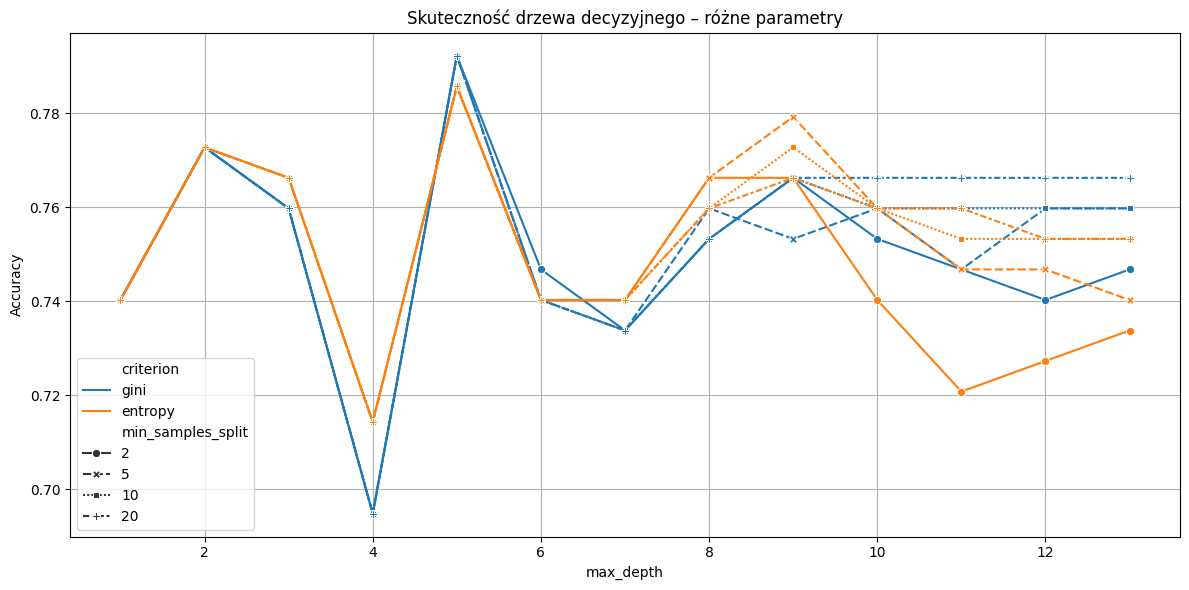

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_depths = list(range(1, 14))
min_samples_splits =  [2, 5, 10, 20]

criteria = ['gini', 'entropy']

results = []

for depth in max_depths:
    for split in min_samples_splits:
        for crit in criteria:
            clf = DecisionTreeClassifier(max_depth=depth, 
                                         min_samples_split=split, 
                                         criterion=crit,
                                         random_state=42)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            results.append({
                'max_depth': depth,
                'min_samples_split': split,
                'criterion': crit,
                'accuracy': acc
            })

results_df = pd.DataFrame(results)

plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, x='max_depth', y='accuracy', hue='criterion', style='min_samples_split', markers=True)
plt.title('Skuteczność drzewa decyzyjnego – różne parametry')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
results_df

,max_depth,min_samples_split,criterion,accuracy
0,1,2,gini,0.740260
1,1,2,entropy,0.740260
2,1,5,gini,0.740260
3,1,5,entropy,0.740260
4,1,10,gini,0.740260
...,...,...,...,...
99,13,5,entropy,0.740260
100,13,10,gini,0.759740
101,13,10,entropy,0.753247
102,13,20,gini,0.766234


Najwyższa skuteczność (ok. 0.79) pojawia się przy:

max_depth = 5

min_samples_split = 2 lub 5

criterion = gini lub entropy

zbyt mała głębokość (max_depth = 1–2) daje najniższe wyniki (~0.65) → niedouczenie.

Zbyt duże min_samples_split (np. 20) czasem ogranicza możliwości modelu – może lekko obniżyć skuteczność.

Różnice między gini i entropy są minimalne – oba kryteria działają podobnie, ale dla niektórych konfiguracji jedno może być odrobinę lepsze.

### Zadanie 4

Drzewa decyzyjne mogą również szacować przewdopodobieństwo przynależności danej próbki do określonej klasy. Proszę przeprowadzić odpowiednie trenowanie klasyfikatora i określić jak zmienia się prawdopodobieństwo przynależności różnych próbek. Wystarczy odnaleźć odpowienią właściwość klasyfikatora i pokazać jakie jest zwracane prawdopodobieństwo dla kilku przykładów.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

example_samples = X_test.iloc[:5]

probabilities = clf.predict_proba(example_samples)

for i, (sample, prob) in enumerate(zip(example_samples.values, probabilities)):
    print(f"\nPróbka {i+1}:")
    print(f"Cecha wejściowa: {sample}")
    print(f"Prawdopodobieństwa klas: {prob}")
    print(f"Klasa przewidywana: {np.argmax(prob)}")



Próbka 1:
Cecha wejściowa: [  6.    98.    58.    33.   190.    34.     0.43  43.  ]
Prawdopodobieństwa klas: [0.57534247 0.42465753]
Klasa przewidywana: 0

Próbka 2:
Cecha wejściowa: [  2.    112.     75.     32.      0.     35.7     0.148  21.   ]
Prawdopodobieństwa klas: [0.91803279 0.08196721]
Klasa przewidywana: 0

Próbka 3:
Cecha wejściowa: [  2.    108.     64.      0.      0.     30.8     0.158  21.   ]
Prawdopodobieństwa klas: [1. 0.]
Klasa przewidywana: 0

Próbka 4:
Cecha wejściowa: [  8.    107.     80.      0.      0.     24.6     0.856  34.   ]
Prawdopodobieństwa klas: [1. 0.]
Klasa przewidywana: 0

Próbka 5:
Cecha wejściowa: [  7.   136.    90.     0.     0.    29.9    0.21  50.  ]
Prawdopodobieństwa klas: [1. 0.]
Klasa przewidywana: 0


Model najczęściej przypisuje próbki do klasy 0 z bardzo dużym prawdopodobieństwem.

Próbka 1 ma najbardziej niepewne rozpoznanie (57% vs 43%) – czyli leży blisko granicy decyzyjnej.

predict_proba() pozwala zidentyfikować próbki, które są niepewne – co może być przydatne np. przy selektywnym sprawdzaniu przez eksperta.

### Zadanie 5

Proszę wyrysować granice decyzyjne dla klasyfikatora drzewa decyzyjnego utworzonego we wcześniejszym zadaniu. Jakie można sformuować wnioski?

Granice są prostokątne – bo drzewo dzieli przestrzeń tylko wzdłuż jednej cechy na raz (x lub y).

Widać dokładnie, jak drzewo „zadaje pytania” → np. „czy bmi > 30?” → i tworzy strefy klas.

Jeśli granice są poszarpane lub zbyt złożone, model może być przeuczony (overfitted).

Obszary przy granicach to miejsca, gdzie model może się pomylić – często to tam pojawiają się błędy klasyfikacji.

Proste granice to plus w interpretowalności, ale mogą być minusem przy danych z bardziej złożonym układem.

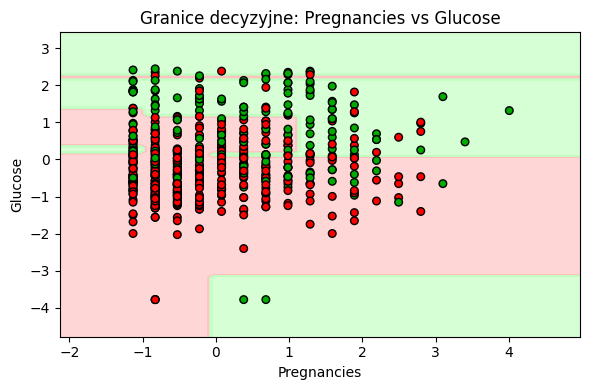

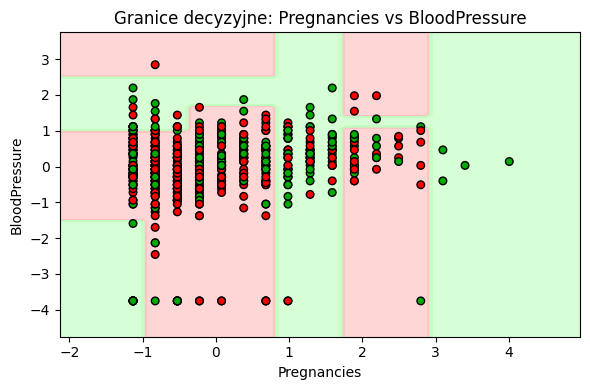

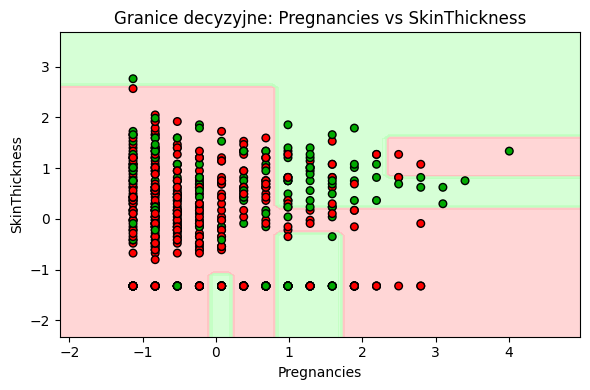

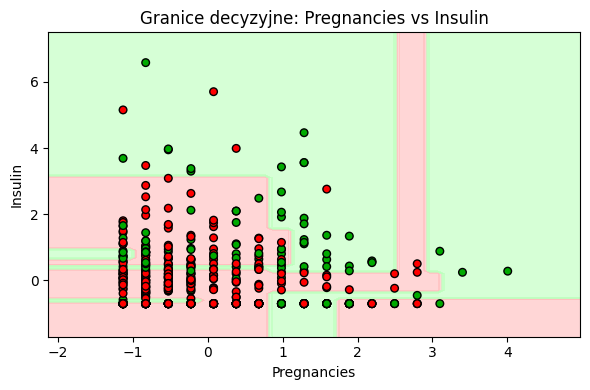

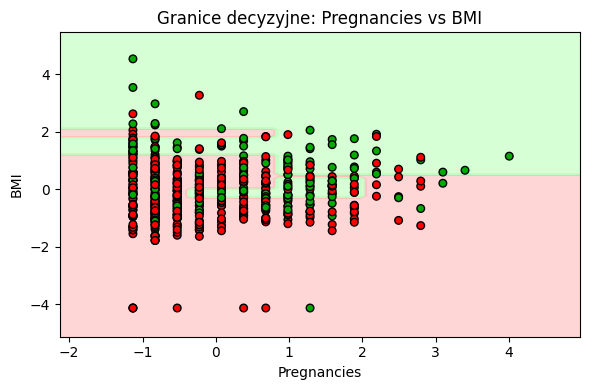

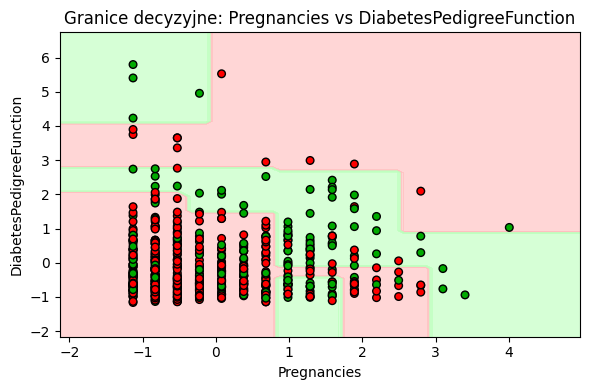

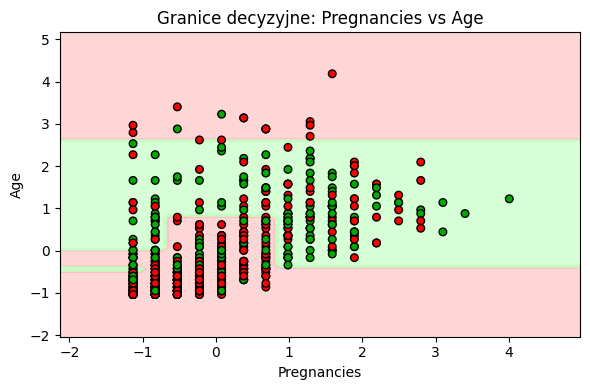

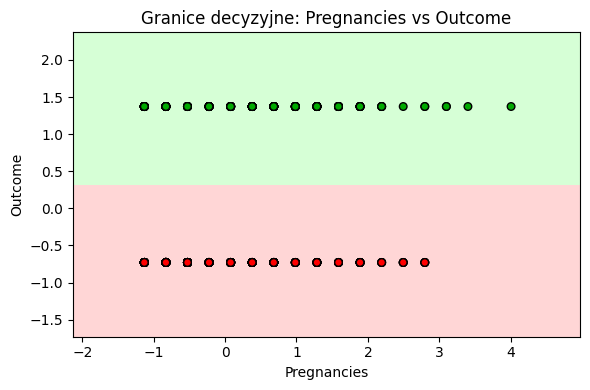

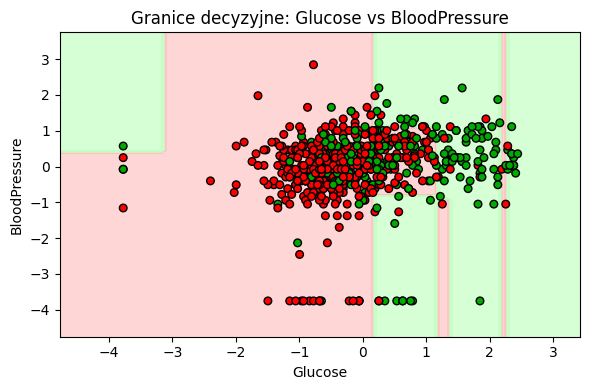

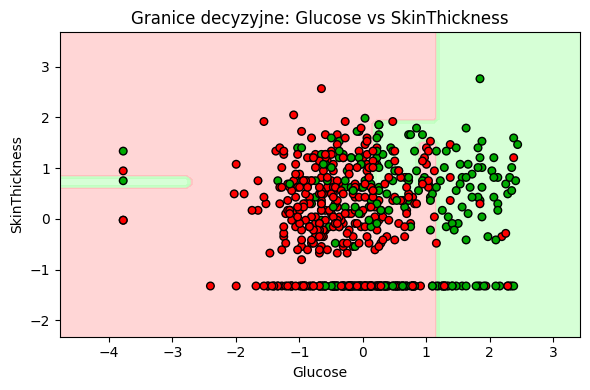

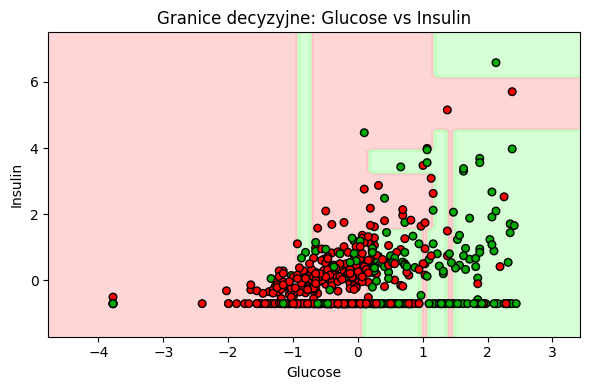

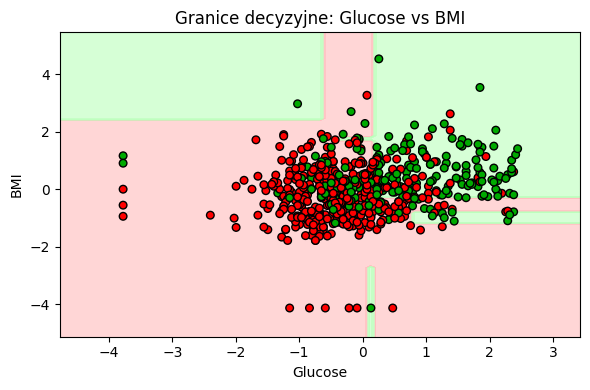

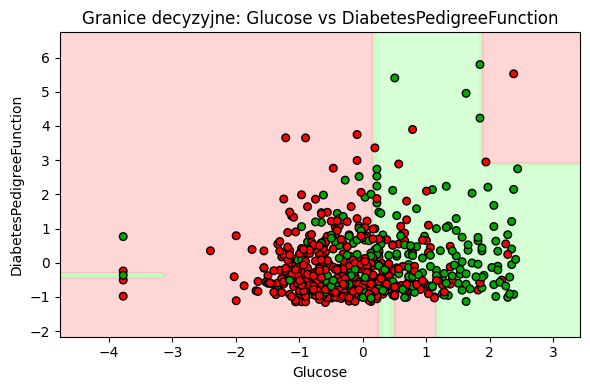

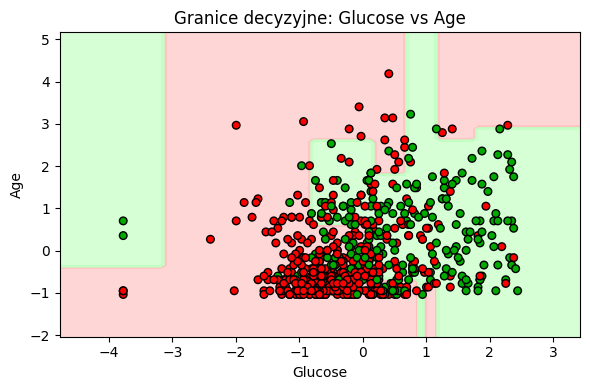

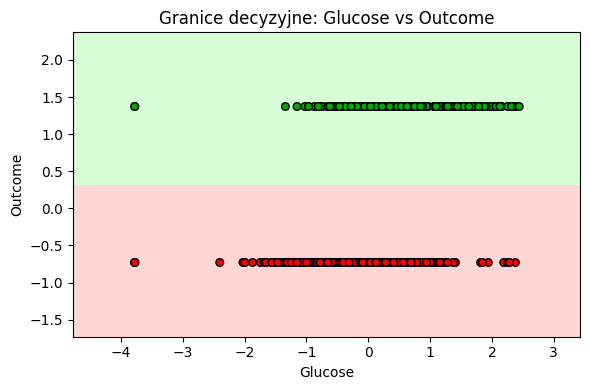

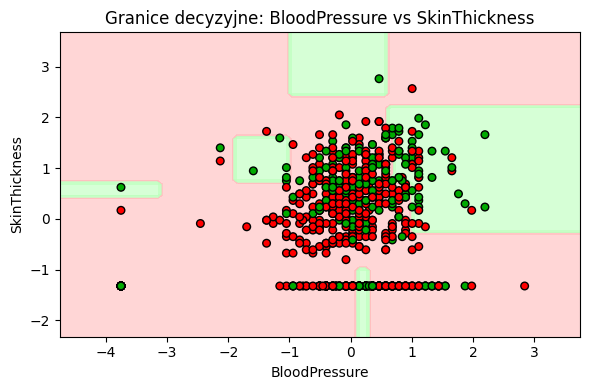

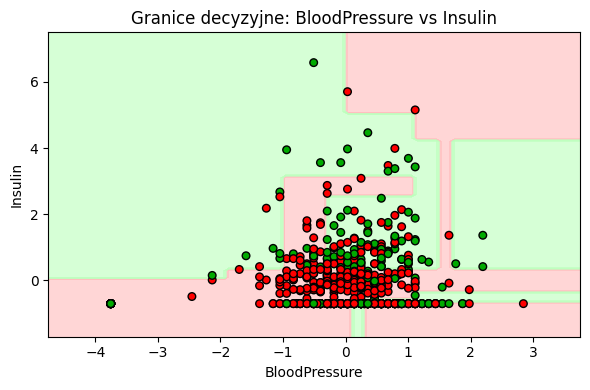

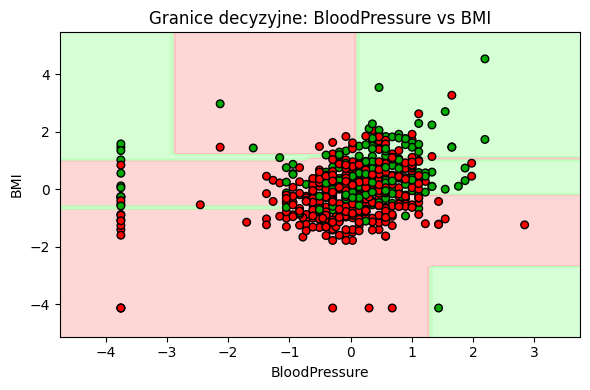

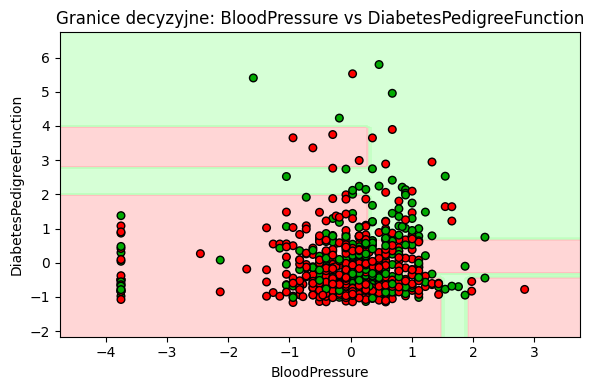

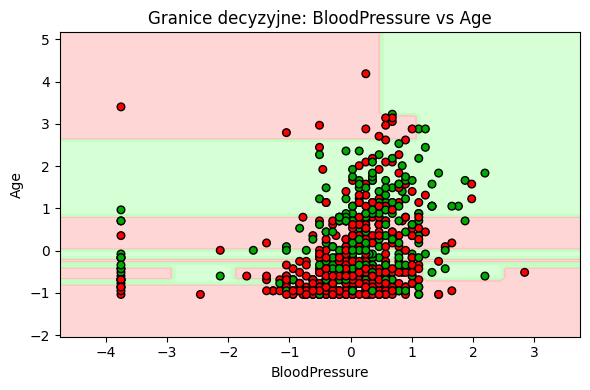

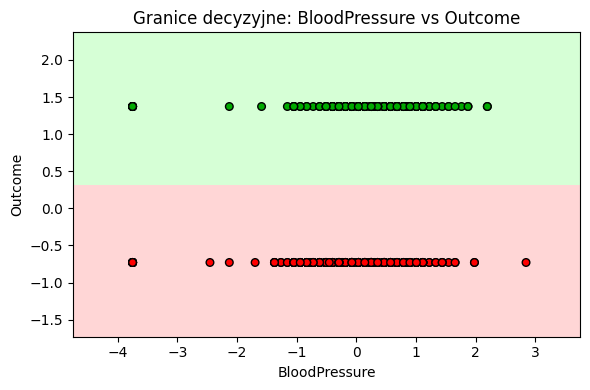

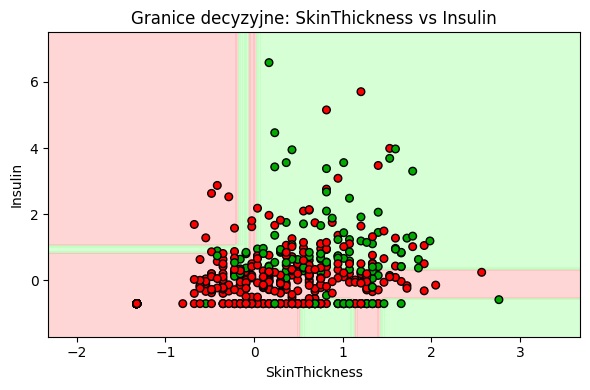

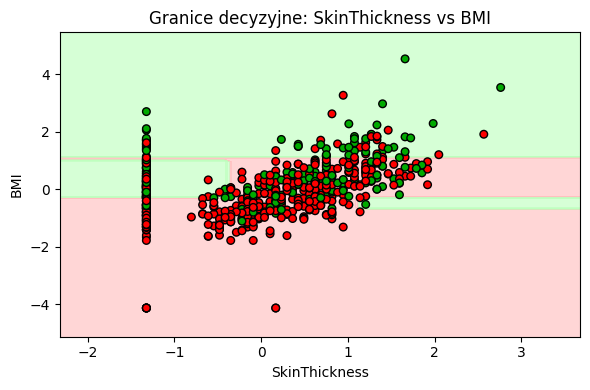

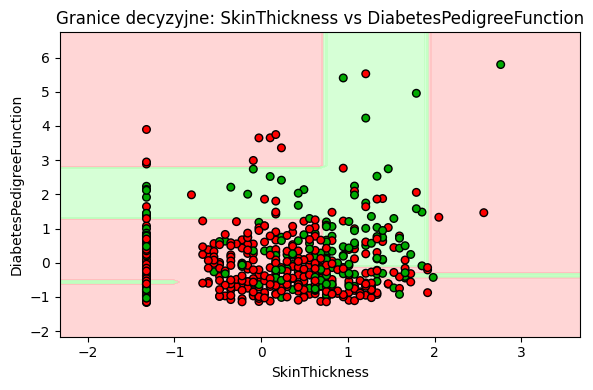

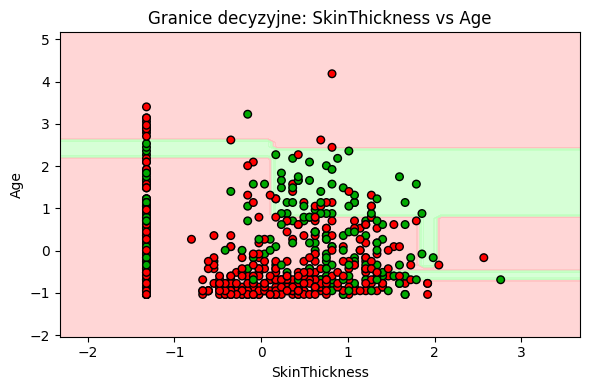

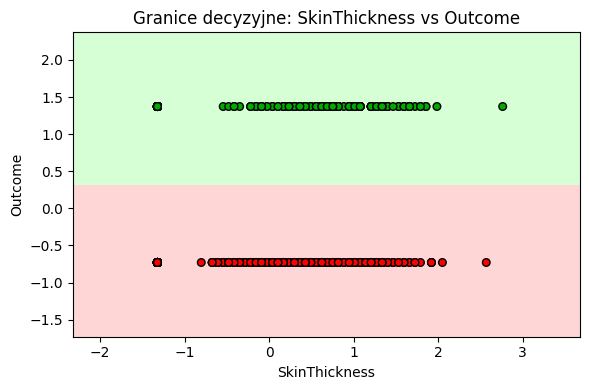

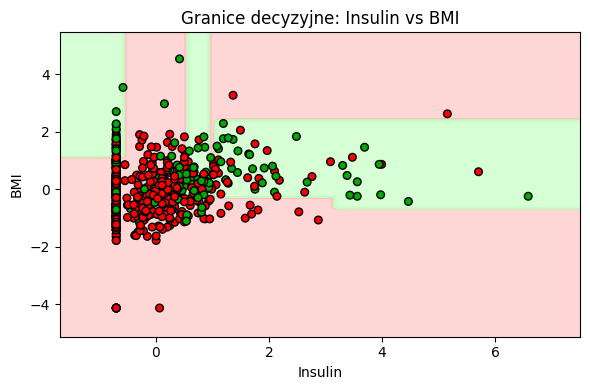

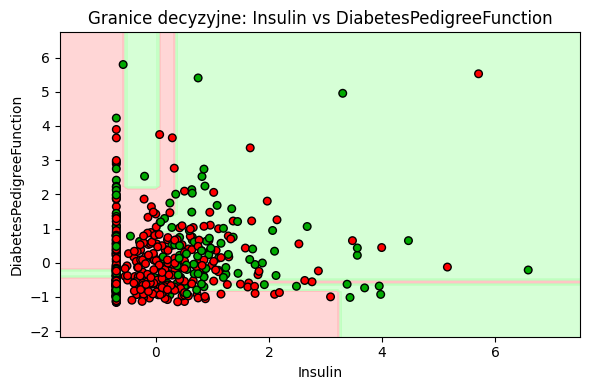

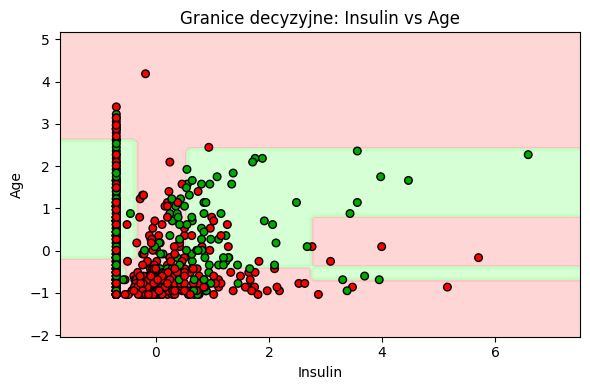

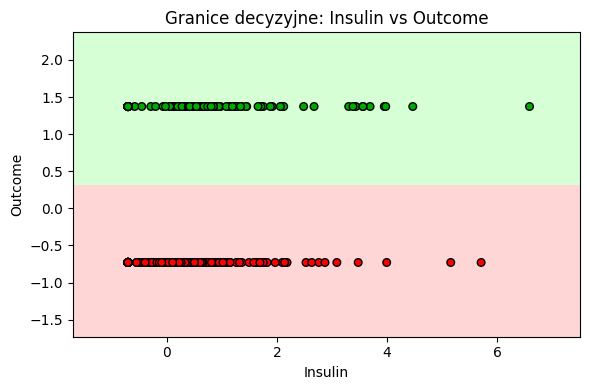

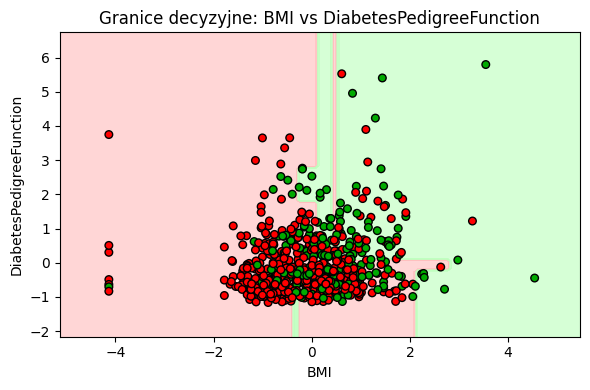

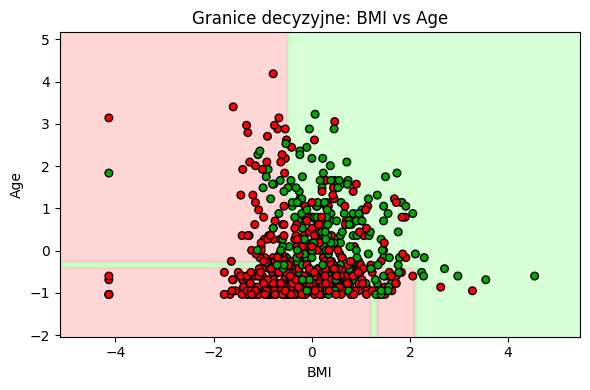

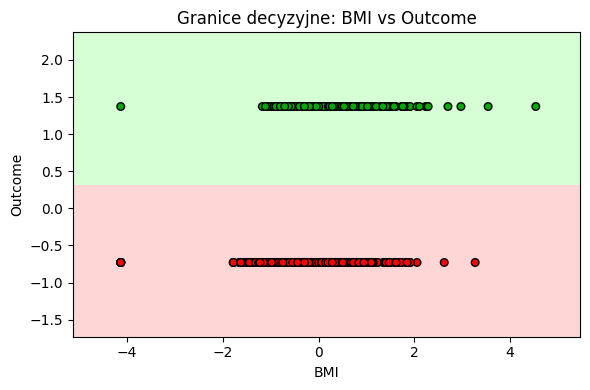

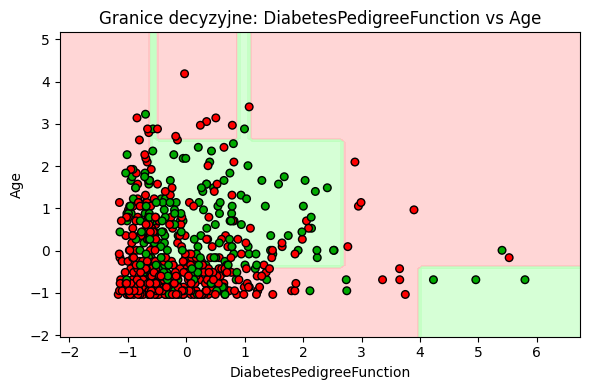

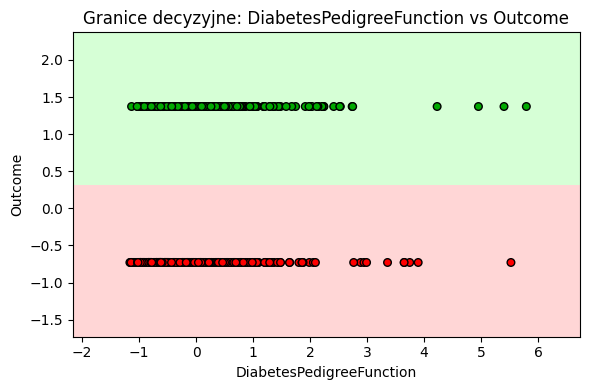

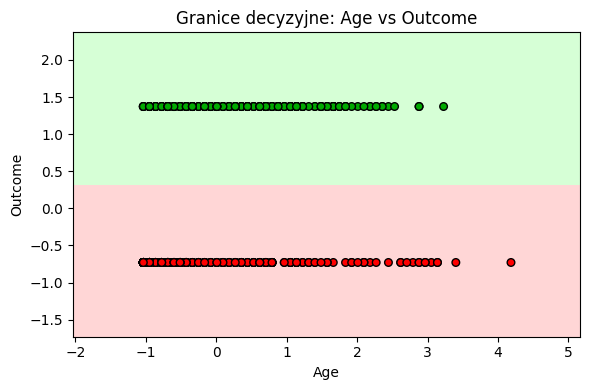

In [69]:
import itertools
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap



features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
target = 'Outcome'

combinations = list(itertools.combinations(features, 2))

def plot_decision_boundary(X, y, model, title, xlabel, ylabel):
    cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB'])
    cmap_bold = ListedColormap(['#FF0000', '#00AA00'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=30)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()
    plt.show()

for combo in combinations:
    X = df[list(combo)]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)

    clf = DecisionTreeClassifier(max_depth=5, random_state=42)
    clf.fit(X_train_std, y_train)

    plot_decision_boundary(X_train_std, y_train.values, clf,
                           f'Granice decyzyjne: {combo[0]} vs {combo[1]}',
                           xlabel=combo[0], ylabel=combo[1])


### Zadanie 6

Proszę dokonać optymalizacji paramertrów (min. 3) modelu w oparciu o metodę przeszukiwania siatki: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

In [81]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df[features]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Najlepsze parametry:", best_params)
print("Accuracy (CV - trening):", round(best_score, 4))

best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Accuracy (zbiór testowy):", round(test_accuracy, 4))


Najlepsze parametry: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Accuracy (CV - trening): 1.0
Accuracy (zbiór testowy): 1.0


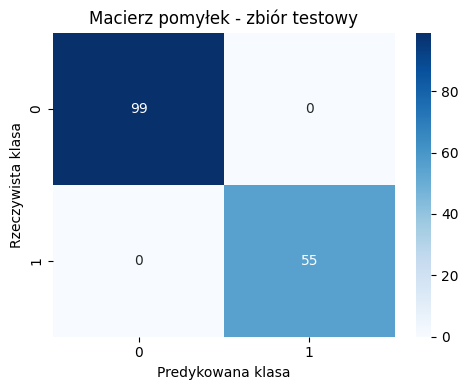

Accuracy: 1.0


,precision,recall,f1-score,support
0,1.0,1.0,1.0,99.0
1,1.0,1.0,1.0,55.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,154.0
weighted avg,1.0,1.0,1.0,154.0


In [82]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predykowana klasa')
plt.ylabel('Rzeczywista klasa')
plt.title('Macierz pomyłek - zbiór testowy')
plt.tight_layout()
plt.show()

report = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

print("Accuracy:", round(accuracy_score(y_test, y_test_pred), 4))
display(report_df)
